In [6]:
import torch
import torch.nn as nn  # 引入pytorch函数库
import torchvision  # 引入pytorch的图形库（torchvision.datasets/.models/.transforms/.utils）
import torchvision.transforms as transforms  # 图形变换（如tensor转换）
 
# 是否使用GPU
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
 
# 设置超参数
NUM_CLASSES = 10  # 分类数目
EPOCHS = 5  # 训练轮次
BATCH_SIZE = 100  # 一轮训练批量大小
LR = 0.001  # 学习率learning_rate
 
# 创建数据集(root：设置数据集保存路径，train:是否为训练数据集，transforms:将PIL或numpy.ndarray转换为tensor格式,download:是否下载数据集)
train_dataset = torchvision.datasets.MNIST(root='data/', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='data/', train=False, transform=transforms.ToTensor(), download=False)
 
# 加载数据集(torch.utilsdata.DataLoader:torch的数据集加载器,dataset:要加载的数据集,batch_size:批量大小,shuffle:是否打乱)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=False)
 
 
# 构造网络模型
# input_size(1*28*28)
# 卷积：(n-k+2p)/s+1   池化：(n-k)/s+1
class LeNet(nn.Module):
    def __init__(self, num_class=10):
        super(LeNet, self).__init__()  # 继承父类所有属性和方法，父类属性用父类的方法初始化
        self.conv1 = nn.Sequential(  # nn.Sequential:相当于一个容器，将一系列操作包含其中
            nn.Conv2d(1, 6, 5, 1, 2),  # Conv2d(in_channels,out_channels,kernel_size,stride,padding)  out_size(6*28*28)
            nn.ReLU(),  # ReLu()激活函数引入非线性，把负值变为0，正值不变
            nn.MaxPool2d(kernel_size=2, stride=2)  # 最大池化层，MaxPool2d(kernel_size,stride,padding)  out_size(6*14*14)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(6, 16, 5),  # out_size(16*10*10)
            nn.ReLU(),
            nn.MaxPool2d(2, 2)  # out_size(16*5*5)
        )
        self.fc1 = nn.Sequential(
            nn.Linear(16 * 5 * 5, 120),  # 全连接层nn.Linear(in_features,out_features)输入和输出的二维张量大小或神经元个数
            nn.ReLU()
        )
        self.fc2 = nn.Sequential(
            nn.Linear(120, 84),
            nn.ReLU()
        )
        self.fc3 = nn.Linear(84, 10)  # 最后一层得到要数字分类的10类概率值
 
    # 前向传播
 
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size()[0], -1)  # 表示将多维的tensor数据展平成一维，torch.view(a,b):重构成a*b维的张量 torch.view(a,-1):-1表示列需要自动计算列数
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x
 
 
model = LeNet(NUM_CLASSES).to(DEVICE)  # 将模型加载到设备上
 
# 构造损失函数和优化器
criterion = nn.CrossEntropyLoss()  # 交叉熵损失函数
optimizer = torch.optim.Adam(model.parameters(), lr=LR)
 
# 训练模型
total_step = len(train_loader)  # 总训练次数
for epoch in range(EPOCHS):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(DEVICE)
        labels = labels.to(DEVICE)
 
        # 前向传播
        outputs = model(images)
        loss = criterion(outputs, labels)
 
        # 反向传播,更新优化器
        optimizer.zero_grad()  # 梯度置零
        loss.backward()  # loss反向传播计算梯度
        optimizer.step()  # 更新网络参数
 
        if (i + 1) % 100 == 0:
            print(f'Epoch[{epoch + 1}/{EPOCHS}], Step[{i + 1}/{total_step}], Loss:{loss.item():.4f}')
 
# 测试模型
model.eval()  # 切换到评估模式而非训练模式即固定参数
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(DEVICE)
        labels = labels.to(DEVICE)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)  # 下划线没有实际意义，表示的是具体的value,用其他变量表示也可以，1表示输出所在行的最大值，为0时表示输出所在列的最大值
        total += labels.size(0)  # 数据总量
        correct += (predicted == labels).sum().item()  # 总准确个数
    print(f'Accuracy:{(100 * correct / total)}%')
 
# 模型保存
torch.save(model.state_dict(), 'LeNet.pth')

Failed to download (trying next):
HTTP Error 403: Forbidden



  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST\raw\train-images-idx3-ubyte.gz to data/MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST\raw\train-labels-idx1-ubyte.gz to data/MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST\raw\t10k-images-idx3-ubyte.gz to data/MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST\raw\t10k-labels-idx1-ubyte.gz to data/MNIST\raw

Epoch[1/5], Step[100/600], Loss:0.3710
Epoch[1/5], Step[200/600], Loss:0.4117
Epoch[1/5], Step[300/600], Loss:0.1451
Epoch[1/5], Step[400/600], Loss:0.1905
Epoch[1/5], Step[500/600], Loss:0.1453
Epoch[1/5], Step[600/600], Loss:0.0853
Epoch[2/5], Step[100/600], Loss:0.0867
Epoch[2/5], Step[200/600], Loss:0.0721
Epoch[2/5], Step[300/600], Loss:0.1355
Epoch[2/5], Step[400/600], Loss:0.0458
Epoch[2/5], Step[500/600], Loss:0.1036
Epoch[2/5], Step[600/600], Loss:0.0244
Epoch[3/5], Step[100/600], Loss:0.1166
Epoch[3/5], Step[200/600], Loss:0.1643
Epoch[3/5], Step[300/600], Loss:0.0325
Epoch[3/5], Step[400/600], Loss:0.1085
Epoch[3/5], Step[500/600], Loss:0.0225
Epoch[3/5], Step[600/600], Loss:0.1009
Epoch[4/5], Step[100/600], Loss:0.1161
Epoch[4/5], Step[200/600], Loss:0.0052
Epoch[4/5], Step[300/600], Loss:0.0280
Epoch[4/5], Step[400/600], Loss:0.1083
Epoch[4/5], Step[500/600], Loss:0.0353
Epoch[4/5], Step[600/600], Loss:

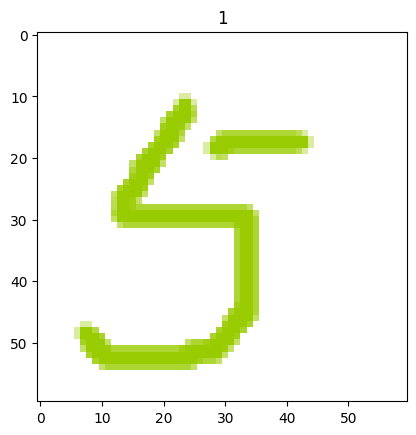

In [11]:
import torch
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms
import numpy as np
 
 
class LeNet(nn.Module):
    def __init__(self, num_class=10):
        super(LeNet, self).__init__()  # 继承父类所有属性和方法，父类属性用父类的方法初始化
        self.conv1 = nn.Sequential(  # nn.Sequential:相当于一个容器，将一系列操作包含其中
            nn.Conv2d(1, 6, 5, 1, 2),  # Conv2d(in_channels,out_channels,kernel_size,stride,padding)  out_size(6*28*28)
            nn.ReLU(),  # ReLu()激活函数引入非线性，把负值变为0，正值不变
            nn.MaxPool2d(kernel_size=2, stride=2)  # 最大池化层，MaxPool2d(kernel_size,stride,padding)  out_size(6*14*14)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(6, 16, 5),  # out_size(16*10*10)
            nn.ReLU(),
            nn.MaxPool2d(2, 2)  # out_size(16*5*5)
        )
        self.fc1 = nn.Sequential(
            nn.Linear(16 * 5 * 5, 120),  # 全连接层nn.Linear(in_features,out_features)输入和输出的二维张量大小或神经元个数
            nn.ReLU()
        )
        self.fc2 = nn.Sequential(
            nn.Linear(120, 84),
            nn.ReLU()
        )
        self.fc3 = nn.Linear(84, 10)  # 最后一层得到要数字分类的10类概率值
 
    # 前向传播
 
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size()[0], -1)  # 表示将多维的tensor数据展平成一维，torch.view(a,b):重构成a*b维的张量 torch.view(a,-1):-1表示列需要自动计算列数
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x
 
 
# 读取图片
test_img = 'newTest6.png'
img = plt.imread(test_img)
images = Image.open(test_img)
images = images.resize((28, 28))
images = images.convert('L')
transform = transforms.ToTensor()
images = transform(images)
images = images.resize(1, 1, 28, 28)
 
# 加载网络模型
model = LeNet()
model.load_state_dict(torch.load('LeNet.pth'))
# model = torch.load('LeNet.pth')
model.eval()
outputs = model(images)
 
values, indices = outputs.data.max(1)  # 返回最大概率值和下标
plt.title('{}'.format((int(indices[0]))))
plt.imshow(img)
plt.show()